In [8]:
import cx_Oracle 
import pandas as pd
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
cursor.execute('select * from PURBYYEAR')
x = cursor.fetchall()
df = pd.DataFrame(x)
df.head()

,0,1,2
0,00001,2014,54041667
1,00001,2015,31000883
2,00002,2014,46245330
3,00002,2015,53635430
4,00003,2014,1893769


In [10]:
# column추가
cursor.execute("select column_name from user_tab_columns where table_name='PURBYYEAR'")
col = cursor.fetchall()
col_list = []
for i in col:
    for j in i:
        col_list.append(j)

df = pd.DataFrame(x,columns=col_list) 
df.head()

,고객번호,YEAR,구매액
0,00001,2014,54041667
1,00001,2015,31000883
2,00002,2014,46245330
3,00002,2015,53635430
4,00003,2014,1893769


In [11]:
df_pv1 = df.pivot(index='고객번호',columns='YEAR',values='구매액')
df_pv2 = df_pv1.reset_index()
df_pv3 = df_pv2.set_index(keys=['고객번호'])
df_pv3.head()

YEAR,2014,2015
고객번호,,
00001,54041667.0,31000883.0
00002,46245330.0,53635430.0
00003,1893769.0,1271398.0
00004,9299616.0,7394194.0
00005,7685880.0,5551190.0


In [ ]:
# 매출액 

In [3]:
import csv
import pickle
import pandas as pd
df1 = pd.read_pickle('./dataset/product.pkl') # 불러오기
df1.head(20)

,상품분류,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년 4분기
0,가구,1564238150,1575012572,1588265591,2195040890,1843042310,1914280650,1864128640,2228246290
1,가전제품,3284030480,3363428630,3145891250,3512916110,3367669810,3663626690,3845919305,4826948150
2,공구류,91839430,83342320,90690910,108776520,71873700,63880390,68608890,83906920
3,귀금속,929146910,1479580620,1564230500,1563038290,882977240,1697627010,1650852430,1791873610
4,도서/문구/완구,514560815,470556123,517552452,516961501,483098049,446530295,408723400,503674585
5,명품,6654742230,7039343580,5988397940,9189064310,8185860170,8893693210,7743514880,11086641070
6,생활,2490702860,2776196430,2641451680,2976335875,2603370640,2792302725,2469218253,3037594489
7,시설/서비스,1822300764,1816112441,2070611294,2335830429,2275560695,2135790645,2252514762,2221081544
8,식료품,20326642065,19632303004,21793660292,19124082949,21813883400,19559247141,22825373141,18873045020
9,잡화,1512649396,1332301797,1585243330,1543220810,1708587185,1656823454,1721993947,1586221850


### 최종 데이터

In [13]:
# 4분기 감소고객 정보 확인
import pandas as pd
df = pd.read_pickle('./dataset/PP_CUS_QUAR.pkl')
df = df.dropna()
df

,고객번호,14년1분기,14년2분기,14년3분기,14년4분기,15년1분기,15년2분기,15년3분기,15년4분기
0,00001,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0
1,00002,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0
2,00003,302782.0,548433.0,648188.0,394366.0,279310.0,312970.0,421017.0,258101.0
3,00004,1309643.0,3732463.0,2434410.0,1823100.0,1737292.0,1919645.0,2127112.0,1610145.0
5,00006,2166006.0,3115284.0,3163273.0,2950816.0,3619234.0,2769821.0,3518094.0,3203889.0
...,...,...,...,...,...,...,...,...,...
19332,19333,613130.0,913988.0,578210.0,455450.0,850690.0,553590.0,252010.0,520430.0
19333,19334,834049.0,2705917.0,2575628.0,2819868.0,1699930.0,767309.0,484920.0,465910.0
19334,19335,937734.0,2783122.0,2320105.0,2042511.0,2199423.0,2852695.0,1553645.0,2011244.0
19335,19336,449600.0,3321870.0,3160370.0,5886390.0,2896520.0,3625250.0,6322150.0,4948690.0


In [14]:
df['14년4분기'].head()

0    23334762.0
1     7080920.0
2      394366.0
3     1823100.0
5     2950816.0
Name: 14년4분기, dtype: float64

In [15]:
# 14년 4분기보다 15년 4분기에 감소한 그룹의 인덱스를 뽑아놓음. 고객 번호 아님.
group4 = df[df['14년4분기'] > df['15년4분기']].index

In [16]:
group13 = df[df['14년4분기'] <= df['15년4분기']].index

In [5]:
# 기존고객
import cx_Oracle 
import pandas as pd
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
cursor.execute('select * from PRODAMOUNT')
x = cursor.fetchall()
cursor.execute("select column_name from user_tab_columns where table_name='PRODAMOUNT'")
col = cursor.fetchall()
col_new = [j for i in col for j in i]
df = pd.DataFrame(x, columns= col_new)
df.to_pickle('./dataset/prodamount.pkl')

In [17]:
# 고객별 상품별 구매
import pandas as pd
prodamount_df = pd.read_pickle('./dataset/prodamount.pkl')
prodamount_df = prodamount_df.fillna(0)
prodamount_df

,고객번호,식료품,가구,가전제품,공구류,귀금속,도서/문구/완구,명품,생활,시설/서비스,잡화,취미/스포츠/레저,패션/의류,화장/세정/세면,편의품,선매품,전문품,기타
0,00001,10960250.0,3400140.0,11153100.0,0.0,489750.0,0.0,503500.0,7173110.0,1050670.0,321470.0,150000.0,46241100.0,3599460.0,11744450.0,71262180.0,993250.0,1042670.0
1,00002,14002460.0,603740.0,7372350.0,11300.0,0.0,0.0,1978060.0,7145660.0,961400.0,988470.0,538690.0,40374170.0,25904460.0,15964550.0,80976750.0,1978060.0,961400.0
2,00003,2801027.0,0.0,26900.0,0.0,0.0,0.0,0.0,66190.0,0.0,125620.0,0.0,87800.0,57630.0,3058267.0,106900.0,0.0,0.0
3,00004,4939480.0,17900.0,0.0,0.0,170000.0,0.0,0.0,804800.0,820100.0,163580.0,82520.0,8605670.0,1089760.0,5405120.0,10298590.0,170000.0,820100.0
4,00005,8043650.0,212300.0,49900.0,0.0,0.0,0.0,57000.0,47000.0,366640.0,76410.0,134280.0,2095920.0,2153970.0,8575070.0,4238360.0,57000.0,366640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,511940.0,0.0,9900.0,0.0,303250.0,0.0,55800.0,0.0,165850.0,378780.0,0.0,1542530.0,2811230.0,3696100.0,1558280.0,359050.0,165850.0
19379,19380,641447.0,0.0,133440.0,2450.0,0.0,3000.0,0.0,0.0,13300.0,159310.0,0.0,29000.0,2931030.0,3695787.0,203890.0,0.0,13300.0
19380,19381,4500179.0,93900.0,0.0,0.0,0.0,2500.0,0.0,305550.0,155300.0,131990.0,67800.0,575500.0,207950.0,4627169.0,1258200.0,0.0,155300.0
19381,19382,3477523.0,4500.0,0.0,1300.0,0.0,12280.0,0.0,14040.0,172830.0,237850.0,41600.0,281800.0,158050.0,3754143.0,474800.0,0.0,172830.0


In [18]:
# 지속고객의 상품구매
prodamount_normal_df = prodamount_df.loc[df.index, :]
prodamount_normal_df

,고객번호,식료품,가구,가전제품,공구류,귀금속,도서/문구/완구,명품,생활,시설/서비스,잡화,취미/스포츠/레저,패션/의류,화장/세정/세면,편의품,선매품,전문품,기타
0,00001,10960250.0,3400140.0,11153100.0,0.0,489750.0,0.0,503500.0,7173110.0,1050670.0,321470.0,150000.0,46241100.0,3599460.0,11744450.0,71262180.0,993250.0,1042670.0
1,00002,14002460.0,603740.0,7372350.0,11300.0,0.0,0.0,1978060.0,7145660.0,961400.0,988470.0,538690.0,40374170.0,25904460.0,15964550.0,80976750.0,1978060.0,961400.0
2,00003,2801027.0,0.0,26900.0,0.0,0.0,0.0,0.0,66190.0,0.0,125620.0,0.0,87800.0,57630.0,3058267.0,106900.0,0.0,0.0
3,00004,4939480.0,17900.0,0.0,0.0,170000.0,0.0,0.0,804800.0,820100.0,163580.0,82520.0,8605670.0,1089760.0,5405120.0,10298590.0,170000.0,820100.0
5,00006,8208277.0,99000.0,19900.0,22250.0,0.0,3100.0,340900.0,1664440.0,737400.0,298890.0,118430.0,8454600.0,4539230.0,9964187.0,13452130.0,340900.0,749200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19332,19333,3358428.0,0.0,0.0,0.0,0.0,51300.0,0.0,2900.0,1252260.0,7610.0,22000.0,43000.0,0.0,3351488.0,133750.0,0.0,1252260.0
19333,19334,9490841.0,19900.0,0.0,0.0,0.0,710240.0,0.0,159400.0,134800.0,301720.0,534850.0,729100.0,272680.0,10944001.0,1281730.0,0.0,127800.0
19334,19335,5906155.0,215350.0,5700.0,153000.0,0.0,2504794.0,0.0,1089270.0,1634500.0,1888160.0,528290.0,1904100.0,871160.0,11738889.0,3327090.0,0.0,1634500.0
19335,19336,1155550.0,0.0,0.0,0.0,0.0,0.0,1119650.0,780850.0,2811100.0,708420.0,0.0,21138470.0,2896800.0,1417270.0,25262820.0,1119650.0,2811100.0


In [20]:
# 4분기 감소한 고객의 상품구매
prodamount_group4 = prodamount_df.loc[group4, :]
prodamount_group4

,고객번호,식료품,가구,가전제품,공구류,귀금속,도서/문구/완구,명품,생활,시설/서비스,잡화,취미/스포츠/레저,패션/의류,화장/세정/세면,편의품,선매품,전문품,기타
0,00001,10960250.0,3400140.0,11153100.0,0.0,489750.0,0.0,503500.0,7173110.0,1050670.0,321470.0,150000.0,46241100.0,3599460.0,11744450.0,71262180.0,993250.0,1042670.0
2,00003,2801027.0,0.0,26900.0,0.0,0.0,0.0,0.0,66190.0,0.0,125620.0,0.0,87800.0,57630.0,3058267.0,106900.0,0.0,0.0
3,00004,4939480.0,17900.0,0.0,0.0,170000.0,0.0,0.0,804800.0,820100.0,163580.0,82520.0,8605670.0,1089760.0,5405120.0,10298590.0,170000.0,820100.0
6,00007,5275706.0,2624600.0,69600.0,19800.0,1478100.0,30000.0,7356750.0,469040.0,1088710.0,419060.0,359600.0,53293040.0,1242270.0,5728226.0,58074490.0,8834850.0,1088710.0
7,00008,26921192.0,0.0,8598630.0,0.0,705000.0,19150.0,141100.0,202830.0,2528440.0,66950.0,0.0,9927600.0,13245060.0,27308932.0,31672480.0,846100.0,2528440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19330,19331,7032989.0,313250.0,55000.0,0.0,0.0,0.0,136610.0,1168720.0,0.0,185580.0,40780.0,9995040.0,180990.0,7509379.0,11462970.0,136610.0,0.0
19331,19332,10528558.0,0.0,123200.0,57840.0,0.0,145100.0,0.0,758780.0,14000.0,1164040.0,92300.0,219080.0,444740.0,13071058.0,462580.0,0.0,14000.0
19333,19334,9490841.0,19900.0,0.0,0.0,0.0,710240.0,0.0,159400.0,134800.0,301720.0,534850.0,729100.0,272680.0,10944001.0,1281730.0,0.0,127800.0
19334,19335,5906155.0,215350.0,5700.0,153000.0,0.0,2504794.0,0.0,1089270.0,1634500.0,1888160.0,528290.0,1904100.0,871160.0,11738889.0,3327090.0,0.0,1634500.0


In [35]:
prodamount_group4['전문품'].value_counts()

0.0           4402
10000.0         92
20000.0         53
39000.0         44
30000.0         43
              ... 
7562850.0        1
1512500.0        1
224020.0         1
11436300.0       1
1119650.0        1
Name: 전문품, Length: 4034, dtype: int64

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
%pwd

### 최종 데이터

In [37]:
import csv
import pickle
import pandas as pd
df = pd.read_csv('./dataset/total.csv', encoding='cp949') 
df

,고객번호,성별,연령대,거주지역,14년 1분기 구매,14년 2분기 구매,14년 3분기 구매,14년 4분기 구매,15년 1분기 구매,15년 2분기 구매,...,15년 3분기 패션/의류,15년 4분기 패션/의류,14년 1분기 화장/세정/세면,14년 2분기 화장/세정/세면,14년 3분기 화장/세정/세면,14년 4분기 화장/세정/세면,15년 1분기 화장/세정/세면,15년 2분기 화장/세정/세면,15년 3분기 화장/세정/세면,15년 4분기 화장/세정/세면
0,1,M,60세이상,60.0,9141590,10783765,10781550,23334762,9302985,8595380,...,5377510.0,3651160.0,1174560.0,544400.0,707000.0,489200.0,523500.0,78000.0,NaN,82800.0
1,2,M,60세이상,100.0,14123470,10199760,14841180,7080920,18481480,9310130,...,5471710.0,5684210.0,5632410.0,2201300.0,2595700.0,1704150.0,3797140.0,3758610.0,2641460.0,3573690.0
2,3,M,60세이상,33.0,302782,548433,648188,394366,279310,312970,...,NaN,7800.0,NaN,16870.0,4900.0,8980.0,NaN,NaN,26880.0,NaN
3,4,F,60세이상,16.0,1309643,3732463,2434410,1823100,1737292,1919645,...,1048800.0,720980.0,69810.0,47200.0,321150.0,296500.0,122520.0,165720.0,27500.0,39360.0
4,6,F,60세이상,240.0,2166006,3115284,3163273,2950816,3619234,2769821,...,1498000.0,1464100.0,506900.0,389700.0,660400.0,903250.0,743250.0,730600.0,191600.0,413530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,F,25세~29세,NaN,613130,913988,578210,455450,850690,553590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18862,19334,M,35세~39세,310.0,834049,2705917,2575628,2819868,1699930,767309,...,382000.0,NaN,19000.0,61280.0,63200.0,15600.0,30500.0,67200.0,NaN,15900.0
18863,19335,F,35세~39세,540.0,937734,2783122,2320105,2042511,2199423,2852695,...,44800.0,167800.0,16100.0,183410.0,68090.0,208610.0,193300.0,115620.0,37330.0,48700.0
18864,19336,F,35세~39세,39.0,449600,3321870,3160370,5886390,2896520,3625250,...,4615800.0,4054840.0,NaN,369200.0,259500.0,1247800.0,676050.0,72800.0,215250.0,56200.0


In [16]:
df1.shape

(18866, 116)

In [22]:
df.columns

Index(['고객번호', '성별', '연령대', '거주지역', '14년 1분기 구매', '14년 2분기 구매', '14년 3분기 구매',
       '14년 4분기 구매', '15년 1분기 구매', '15년 2분기 구매',
       ...
       '15년 3분기 패션/의류 등급', '15년 4분기 패션/의류 등급', '14년 1분기 화장/세정/세면 등급',
       '14년 2분기 화장/세정/세면 등급', '14년 3분기 화장/세정/세면 등급', '14년 4분기 화장/세정/세면 등급',
       '15년 1분기 화장/세정/세면 등급', '15년 2분기 화장/세정/세면 등급', '15년 3분기 화장/세정/세면 등급',
       '15년 4분기 화장/세정/세면 등급'],
      dtype='object', length=228)

In [38]:
df = df.fillna(0) # 비어있는 값은 0으로
columns = df.columns.to_list() # for문 사용하기 위해 다 to_list 해줌
del columns[0:4] 
columns

for col in columns: # 등급제 적용
    df[col+' 등급'] = 0
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)

    iqr=q3-q1

    hw = df[col] > q3+1.5*iqr # 최댓값
    hidx = df[hw].index
    tem_df = df.drop(hidx)

    t1 = tem_df[col].quantile(0.2)
    t2 = tem_df[col].quantile(0.4)
    t3 = tem_df[col].quantile(0.6)
    t4 = tem_df[col].quantile(0.8)

    c1 = df[col] < t1
    c2 = (df[col] >= t1) & (df[col] < t2)
    c3 = (df[col] >= t2) & (df[col] < t3)
    c4 = (df[col] >= t3) & (df[col] < t4)
    c5 = (df[col] >= t4)

    df.loc[c1,col+' 등급'] = 1
    df.loc[c2,col+' 등급'] = 2
    df.loc[c3,col+' 등급'] = 3
    df.loc[c4,col+' 등급'] = 4
    df.loc[c5,col+' 등급'] = 5
    df.loc[hidx,col+' 등급'] = 5 # 제일 많이 쓴 금액 
    
    # 분기별의 변화를 

In [19]:
df.shape

(18866, 228)

In [ ]:
df3= df.copy()
df3['label'] = ''
df3.label[df3['15년 4분기 구매']-df3['14년 4분기 구매']>=0] = 1
df3.label[df3['15년 4분기 구매']-df3['14년 4분기 구매']<0] = 0

In [40]:
# 학습할 데이터
df2 = df.copy()
prodcl = {'식료품':'"식료품"', '가구':'"가구"','가전제품':'"가전제품"','공구류':'"공구류"',
        '귀금속':'"귀금속"', '도서/문구/완구':'"도서/문구/완구"', '명품': '"명품"', '생활': '"생활"',
        '시설/서비스':'"시설/서비스"','잡화':'"잡화"','취미/스포츠/레저':'"취미/스포츠/레저"',
        '패션/의류':'"패션/의류"','화장/세정/세면':'"화장/세정/세면"'}

for i in prodcl.keys():
    for j in range(2,5):
        df2[f'14년 {j}분기 {i} 등급 증감'] = df2[f'14년 {j}분기 {i} 등급'] - df2[f'14년 {j-1}분기 {i} 등급']
        df2[f'15년 {j}분기 {i} 등급 증감'] = df2[f'14년 {j}분기 {i} 등급'] - df2[f'14년 {j-1}분기 {i} 등급']
    df2[f'15년 1분기 {i} 등급 증감'] = df2[f'15년 1분기 {i} 등급'] - df2[f'14년 4분기 {i} 등급']
    
# 분기별 상품 구매액 컬럼 리스트
prodcl = {'식료품':'"식료품"', '가구':'"가구"','가전제품':'"가전제품"','공구류':'"공구류"',
        '귀금속':'"귀금속"', '도서/문구/완구':'"도서/문구/완구"', '명품': '"명품"', '생활': '"생활"',
        '시설/서비스':'"시설/서비스"','잡화':'"잡화"','취미/스포츠/레저':'"취미/스포츠/레저"',
        '패션/의류':'"패션/의류"','화장/세정/세면':'"화장/세정/세면"',
        '구매 등급':'"구매"'}
li1 = []
for i in ['14년 ','15년 ']:
    for j in ['1분기 ','2분기 ','3분기 ','4분기 ']:
        for k in prodcl.keys():
            li1.append(i+j+k)
            
# 4분기 관련 정보들과 고객번호 리스트
li2 = ['고객번호','15년 4분기 구매',
        '15년 4분기 식료품 등급','15년 4분기 가구 등급','15년 4분기 가전제품 등급','15년 4분기 공구류 등급',
        '15년 4분기 귀금속 등급', '15년 4분기 도서/문구/완구 등급','15년 4분기 명품 등급',
        '15년 4분기 생활 등급', '15년 4분기 시설/서비스 등급','15년 4분기 잡화 등급',
        '15년 4분기 취미/스포츠/레저 등급','15년 4분기 패션/의류 등급','15년 4분기 화장/세정/세면 등급']

# 분기별 상품 구매액은 등급으로만 넣고, 4분기의 정보는 빼는 과정
df1 = df2.copy()
df1 = df1.drop(li1+li2,axis=1)
df1['label'] = df3.label
df1.label = df1.label.astype('int64')

# 14년 1분기~ 15년 3분기까지 총 7분기 학습
# 타켓은 8분기

In [45]:
df1.to_csv('./dataset/project.csv', encoding='CP949')

In [63]:
df = pd.read_csv('./dataset/project.csv', encoding='CP949')
df.head()

,Unnamed: 0,성별,연령대,거주지역,14년 1분기 구매,14년 2분기 구매,14년 3분기 구매,14년 4분기 구매,15년 1분기 구매,15년 2분기 구매,...,15년 4분기 패션/의류 등급 증감,15년 1분기 패션/의류 등급 증감,14년 2분기 화장/세정/세면 등급 증감,15년 2분기 화장/세정/세면 등급 증감,14년 3분기 화장/세정/세면 등급 증감,15년 3분기 화장/세정/세면 등급 증감,14년 4분기 화장/세정/세면 등급 증감,15년 4분기 화장/세정/세면 등급 증감,15년 1분기 화장/세정/세면 등급 증감,label
0,0,M,60세이상,60.0,9141590,10783765,10781550,23334762,9302985,8595380,...,0,0,0,0,0,0,0,0,0,0
1,1,M,60세이상,100.0,14123470,10199760,14841180,7080920,18481480,9310130,...,0,0,0,0,0,0,0,0,0,1
2,2,M,60세이상,33.0,302782,548433,648188,394366,279310,312970,...,0,0,0,0,0,0,0,0,0,0
3,3,F,60세이상,16.0,1309643,3732463,2434410,1823100,1737292,1919645,...,-1,0,-1,-1,3,3,0,0,-1,0
4,4,F,60세이상,240.0,2166006,3115284,3163273,2950816,3619234,2769821,...,0,-1,0,0,0,0,0,0,0,1


In [52]:
X_data = df.drop('label', axis=1) #독립변수
y_data = df['label'] #종속변수

In [53]:
X_data = X_data.drop(['Unnamed: 0'], axis=1)

In [58]:
X_data['성별'].value_counts()

F    15526
M     3340
Name: 성별, dtype: int64

In [59]:
X_data['연령대'].value_counts()

45세~49세    4005
40세~44세    3617
50세~54세    3052
35세~39세    2708
55세~59세    1741
30세~34세    1619
60세이상      1281
25세~29세     618
20세~24세     211
19세이하        14
Name: 연령대, dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_data = df.drop('label', axis=1) #독립변수
y_data = df['label'] #종속변수
X_data = X_data.drop(['Unnamed: 0'], axis=1) #불필요 칼럼 드랍


le = LabelEncoder()
features = ['성별','연령대']

for feature in features:
    X_data[feature] = le.fit_transform(X_data[feature])
    
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2, random_state=10)

# 모델 학습 및 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test,lr_preds)
roc_auc = roc_auc_score(y_test,lr_preds_proba)
print(f'accuracy: {accuracy:.4f}')
print(f'roc_auc: {roc_auc:.4f}')

accuracy: 0.6953
roc_auc: 0.7470


In [29]:
import csv
import pickle
import pandas as pd
df = pd.read_csv('./dataset/total2.csv', encoding='cp949') 
print(len(df.columns))

195


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier # LightGBM


X_data = df.drop('label', axis=1) #독립변수
y_data = df['label'] #종속변수
X_data = X_data.drop(['Unnamed: 0'], axis=1) #불필요 칼럼 드랍


le = LabelEncoder()
features = ['성별','연령대','지역명']


for feature in features:
    X_data[feature] = le.fit_transform(X_data[feature])
    
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.2, random_state=10)

# 모델 학습 및 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test,lr_preds)
roc_auc = roc_auc_score(y_test,lr_preds_proba)
print(f'accuracy: {accuracy:.4f}')
print(f'roc_auc: {roc_auc:.4f}')


accuracy: 0.6953
roc_auc: 0.7470


In [ ]:
coef = pd.Series(lr_reg.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y = coef_sort.index)

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')

print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.78403	validation_1-auc:0.73030
[1]	validation_0-auc:0.80795	validation_1-auc:0.75017
[2]	validation_0-auc:0.82407	validation_1-auc:0.76116
[3]	validation_0-auc:0.83012	validation_1-auc:0.76454
[4]	validation_0-auc:0.83936	validation_1-auc:0.76822
[5]	validation_0-auc:0.84484	validation_1-auc:0.77027
[6]	validation_0-auc:0.85033	validation_1-auc:0.77252
[7]	validation_0-auc:0.85407	validation_1-auc:0.77358
[8]	validation_0-auc:0.85754	validation_1-auc:0.77648
[9]	validation_0-auc:0.86151	validation_1-auc:0.77767
[10]	validation_0-auc:0.86645	validation_1-auc:0.77984
[11]	validation_0-auc:0.87112	validation_1-auc:0.78033
[12]	validation_0-auc:0.87324	validation_1-auc:0.78092
[13]	validation_0-auc:0.87579	validation_1-auc:0.78146
[14]	validation_0-auc:0.87878	validation_1-auc:0.78126
[15]	validation_0-auc:0.88113	validation_1-auc:0.78136
[16]	validation_0-auc:0.88212	validation_1-auc:0.78137
[17]	validation_0-auc:0.88612	validation_1-auc:0.78027
[18]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

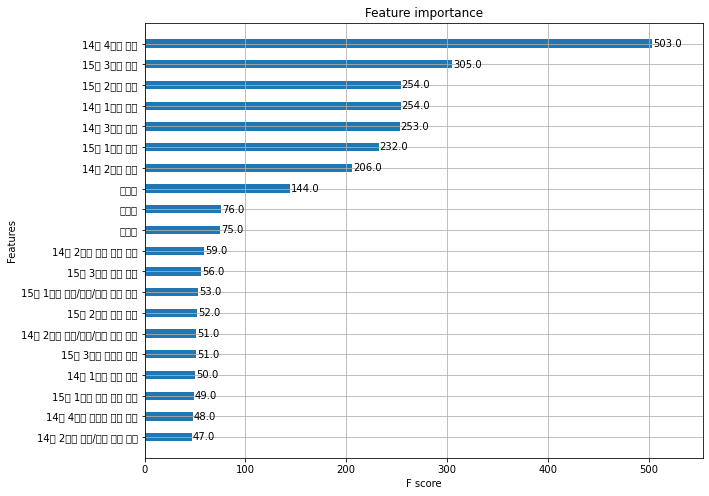

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [1]:
import cx_Oracle 
import pandas as pd
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
cursor.execute('select * from A01')
x = cursor.fetchall()
df = pd.DataFrame(x)
df.head()

,0,1,2
0,0,3433,26605308
1,1,312,7248300
2,2,213,15636290
3,3,95,3700570
4,4,127,12761056


In [2]:
cursor.execute("select column_name from user_tab_columns where table_name='A01'")
col = cursor.fetchall()
col_list = []
for i in col:
    for j in i:
        col_list.append(j)

df = pd.DataFrame(x,columns=col_list) 
df.head()

,구매시간,총 구매 건수,총 구매액
0,0,3433,26605308
1,1,312,7248300
2,2,213,15636290
3,3,95,3700570
4,4,127,12761056


In [4]:
df1=df.copy()
df1.head()

,구매시간,총 구매 건수,총 구매액
0,0,3433,26605308
1,1,312,7248300
2,2,213,15636290
3,3,95,3700570
4,4,127,12761056


In [3]:
import csv
import pickle
import pandas as pd
df = pd.read_csv('./dataset/0329data.csv', encoding='cp949')
df

,Unnamed: 0,14년 1분기 구매,14년 2분기 구매,14년 3분기 구매,15년 1분기 구매,15년 2분기 구매,15년 3분기 구매,1분기 신장율,2분기 신장율,3분기 신장율,...,시간1,시간2,시간3,시간4,연령대,지역명,경과일,주말변화,14년 4분기 구매,label
0,0,9141590,10783765,10781550,9302985,8595380,7806580,1.017655,0.797067,0.417657,...,0.0,121515.579268,98828.296078,38796.285714,9,0,9,0.154,23334762,0
1,1,14123470,10199760,14841180,18481480,9310130,13842600,1.308565,0.912779,1.134392,...,0.0,145532.516556,127401.390476,0.000000,9,5,2,-0.193,7080920,1
2,2,302782,548433,648188,279310,312970,421017,0.922479,0.570662,0.654505,...,0.0,2713.485981,4270.698225,0.000000,9,32,9,0.231,394366,0
3,3,1309643,3732463,2434410,1737292,1919645,2127112,1.326539,0.514311,0.784777,...,0.0,17623.431034,23321.539568,0.000000,9,13,1,0.115,1823100,0
4,4,2166006,3115284,3163273,3619234,2769821,3518094,1.670925,0.889107,1.075914,...,0.0,21818.818182,15068.534884,0.000000,9,4,1,0.000,2950816,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,18861,613130,913988,578210,850690,553590,252010,1.387455,0.605686,0.511703,...,0.0,5544.137931,1844.718519,5982.424242,2,21,3,-0.077,455450,1
18862,18862,834049,2705917,2575628,1699930,767309,484920,2.038166,0.283567,0.163908,...,0.0,20171.615385,16449.575510,11174.120536,4,40,32,-0.039,2819868,0
18863,18863,937734,2783122,2320105,2199423,2852695,1553645,2.345466,1.024998,0.796519,...,0.0,14246.957895,16670.564626,21440.000000,4,35,1,0.270,2042511,0
18864,18864,449600,3321870,3160370,2896520,3625250,6322150,6.442438,1.091328,1.954314,...,0.0,34493.827160,60369.455587,17410.000000,4,19,6,0.154,5886390,0
